# Przetwarzanie tekstów to obecnie jedno z kluczowych zagadnień analizy danych. 

Podstawowe zadania poruszone dziś:
<ul>
    <li>wyszukiwanie/rekomendacja dokumentów dla danego zapytania</li> 
    <li>klasyfiakcja na danych tekstowych</li>
    <li>wydobywanie informacji z tekstu</li>
</ul>
Problematyka jest o wiele szersza (tłumaczenie maszynowe, analiza składniowa, generowanie tekstu, itp.).

Aby móc radzić sobie z powyższymi zadnaiami konieczne jest zdefiniowanie miary podobieństwa na dancyh tekstowych (co to znaczy że tekty są podobne). Propozycje?




# Teksty nie są podane w formie wektorowej 

Teksty nie są podane w formie wektorowej - są to ciągi znaków. Pierwszym zadniem na dziś będzie budowa wektorowej reprezentacji tekstów (dokumentów). 

Najprostsza reprezentacja: każde słowo reprezentuje atrybut - jeśli dokument posiada słowo to wartość atrybutu jest 1, a jeśli nie to 0.


Na tą fazę składa się:
<ul>
    <li>tokenizacja</li> 
    <li>czyszczenie tekstu: usuwanie stop words / stemowanie / lematyzacja</li>
    <li>zliczanie częstości</li>
    <li>opcjonalnie: normalizacja</li>
</ul>



### Przygotowanie do zajęć

1. W konsoli linuxowej:
 - pip install gensim
 - pip install nltk

2. w Jupyterze (pobieranie zasobów):
 - `import nltk`
 - `nltk.download()` (wyskoczy okienko)
 - zanaczamy wiersz "popular" i klikamy "download"

3. w Jupyterze:
 - `from sklearn.datasets import fetch_20newsgroups`
 - `newsgroups_train = fetch_20newsgroups(subset='train')`

# Tokenizacja i czyszczenie tekstu

Jest to podział dokumentu na atomowe częsci np. słowa. Istnieją różne tokenizatory które są dedykowane do okreslonych danych np. tekst w książce jest inny od tekstu w tweetach (inne są tam interesujące ciągi znaków).

In [2]:
import nltk
# nltk.download()

# Zad. 
Bierzemy tekst (dokument). Proszę podzielić ten dokument na zdania - każde zdanie będzię dla nas jednym przykładem uczącym.

In [3]:
EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard. I'm 20 years old."

sentences = EXAMPLE_TEXT.split('.')
print(sentences)

['Hello Mr', ' Smith, how are you doing today? The weather is great, and Python is awesome', ' The sky is pinkish-blue', " You shouldn't eat cardboard", " I'm 20 years old", '']


### Czy są jakieś artefakty? 

Do lepszej tokenizacji będziemy używać nltk.


In [4]:
# ?nltk.sent_tokenize

In [5]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(EXAMPLE_TEXT)
print(sentences)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard.", "I'm 20 years old."]


Dostaliśmy zbiór zdań, który będzie naszym korpusem (zbiorem danych tekstowych). 

* Teraz chcemy zamienić każde zdanie na wektor -- atrybuty będą identyfikowane przez tokeny (np. słowa), a wartość na danym atrybucie to ilość danego tokenu w zdaniu. 

* Wpierw musimy wydzielić tokeny.

# Zad. 
Proszę wziąć pierwsze zdanie i podzielić je na słowa.

In [6]:
sentence = sentences[0]
sentence.split(' ')

['Hello', 'Mr.', 'Smith,', 'how', 'are', 'you', 'doing', 'today?']

# Zad. 
Spróbujmy użyć nltk.

In [7]:
from nltk.tokenize import word_tokenize

sentence = sentences[0]


word_tokens = word_tokenize(sentence)
print(word_tokens)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?']


## Znak zapytania został potraktowany jako osobny token.



# Zad: 
Istnieją inne tokenizatory, które bardziej nadają się do tekstów potocznych np. tweetów. Proszę poeksperymentować z TweetTokenizer z nltk: https://www.nltk.org/api/nltk.tokenize.html

In [8]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
s0 = sentences[0]
tknzr.tokenize(s0)

['Hello', 'Mr', '.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?']

# Zad: 
Proszę podzielić wszystkie zdania na tokeny i zrobić listę list jako wynik.

In [9]:
sentences_tokens = [word_tokenize(sentence) for sentence in sentences]
sentences_tokens

[['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?'],
 ['The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.'],
 ['The', 'sky', 'is', 'pinkish-blue', '.'],
 ['You', 'should', "n't", 'eat', 'cardboard', '.'],
 ['I', "'m", '20', 'years', 'old', '.']]

### Musimy podjąć decyzję czy takie tokeny nam odpowiadają. Możemy usunąć punktory.

In [10]:
import string 
#tu mamy znaki interpunkcyjne
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


# Zad 
Proszę przefiltrować stokenizowane zdanie tak aby usunąć tokeny będące punktorami.

In [11]:
filtered_sentence = [w for w in word_tokens if not w in set(string.punctuation)]
filtered_sentence

['Hello', 'Mr.', 'Smith', 'how', 'are', 'you', 'doing', 'today']

# Zad 
Proszę w ten sposób przefiltrować cały dokument.

In [12]:
filtered_sentences = [[w for w in sentence if not w in set(string.punctuation)] for sentence in sentences_tokens]
filtered_sentences

[['Hello', 'Mr.', 'Smith', 'how', 'are', 'you', 'doing', 'today'],
 ['The', 'weather', 'is', 'great', 'and', 'Python', 'is', 'awesome'],
 ['The', 'sky', 'is', 'pinkish-blue'],
 ['You', 'should', "n't", 'eat', 'cardboard'],
 ['I', "'m", '20', 'years', 'old']]

# Zad 
Czy liczby są dla nas interesujące? Proszę usunąć tokenty będące liczbami.

In [13]:
sentence = filtered_sentences[4]
print(sentence)

[w for w in sentence if not w.isdigit()]


['I', "'m", '20', 'years', 'old']


['I', "'m", 'years', 'old']

# Zad 
Czasem wiedza że w tekście są liczby jest ważna - proszę zastąpić liczby ustalonym tokenem

In [14]:
[w if not w.isdigit() else "<NUMBER>" for w in sentence]

['I', "'m", '<NUMBER>', 'years', 'old']

# Zad 
Warto czasem nierozróżniać dużych i małych liter. Inaczej słowo pisane z dużej i małej litery będzie znaczyło co innego. 
Proszę zamienić wszystkie tokeny na pisane małymi literami.

In [15]:
filtered_sentences = [[w.lower() for w in sentence if not w in set(string.punctuation)] for sentence in sentences_tokens]
filtered_sentences

[['hello', 'mr.', 'smith', 'how', 'are', 'you', 'doing', 'today'],
 ['the', 'weather', 'is', 'great', 'and', 'python', 'is', 'awesome'],
 ['the', 'sky', 'is', 'pinkish-blue'],
 ['you', 'should', "n't", 'eat', 'cardboard'],
 ['i', "'m", '20', 'years', 'old']]

# Zad 

Zbierzmy to czego się nauczyliśmy. Proszę napisać zestaw funkcji:

 * **doc2sen** - bierze dokument i dzili go na zdania
 * **sen2token** - bierze zdanie i dzieli go na tokeny
 * **remove_punctuation** - bierze listę tokenów i usuwa punktory
 * **remove_numbers** - bierze listę tokenów i usuwa liczby
 * **to_lower** - bierze listę tokenów i zamienia na małe litery
 * **preprocessText** - bierze listę dokumentów i wykonuje wszystki funkcje poza pierwszą

In [16]:
#TODO
def doc2sen(docs):
    return  sent_tokenize(docs)

def sen2token(sentence):
    return word_tokenize(sentence)

def remove_punctuation(words):
    remove_list = string.punctuation
    return [w for w in words if not w in set(remove_list)]

def remove_nummbers(words):
    return [w for w in words if not w.isdigit()]

def to_lower(words):
    return [w.lower() for w in words]

def preprocessing_doc(words):
    words = sen2token(words)
    words = remove_punctuation(words)
    words = remove_nummbers(words)
    words = to_lower(words)
    return words

def preprocessing_text(corpus):
    return [preprocessing_doc(doc) for doc in corpus]

In [17]:
preprocessing_text(sentences)

[['hello', 'mr.', 'smith', 'how', 'are', 'you', 'doing', 'today'],
 ['the', 'weather', 'is', 'great', 'and', 'python', 'is', 'awesome'],
 ['the', 'sky', 'is', 'pinkish-blue'],
 ['you', 'should', "n't", 'eat', 'cardboard'],
 ['i', "'m", 'years', 'old']]

# Teksty ze stron internetowych
 
W praktyce mamy głównie do czynienia z tekstami ze stron internetowych. W takim przypadku musimy pobrać tekst strony i dodatowo oczyścić z kodu html. Pokażemy jak to zrobić na uproszczonym przykładzi.

Bierzemy tekst zawierający html. Pierwszym krokiem jest usunięcie znaczników html.



In [18]:
sample_html = """<h1>Title Goes Here</h1>
<b>Bolded Text</b>
<i>Italicized Text</i>
<img src="this should all be gone"/>
<a href="this will be gone, too">But this will still be here!</a>
I run. He ran. She is running. Will they stop running?
I talked. She was talking. They talked to them about running. Who ran to the talking runner?

¡Sebastián, Nicolás, Alejandro and Jéronimo are going to the store tomorrow morning!
something... is! wrong() with.,; this :: sentence.
I can't do this anymore. I didn't know them. Why couldn't you have dinner at the restaurant?
My favorite movie franchises, in order: Indiana Jones; Marvel Cinematic Universe; Star Wars; Back to the Future; Harry Potter.
Don't do it.... Just don't. Billy! I know what you're doing. This is a great little house you've got here.

John: "Well, well, well."
James: "There, there. There, there."
&nbsp;&nbsp;
There are a lot of reasons not to do this. There are 101 reasons not to do it. 1000000 reasons, actually.
I have to go get 2 tutus from 2 different stores, too.
22    45   1067   445
{{Here is some stuff inside of double curly braces.}}
{Here is more stuff in single curly braces.}

</body>
</html>"""

sample_html

'<h1>Title Goes Here</h1>\n<b>Bolded Text</b>\n<i>Italicized Text</i>\n<img src="this should all be gone"/>\n<a href="this will be gone, too">But this will still be here!</a>\nI run. He ran. She is running. Will they stop running?\nI talked. She was talking. They talked to them about running. Who ran to the talking runner?\n\n¡Sebastián, Nicolás, Alejandro and Jéronimo are going to the store tomorrow morning!\nsomething... is! wrong() with.,; this :: sentence.\nI can\'t do this anymore. I didn\'t know them. Why couldn\'t you have dinner at the restaurant?\nMy favorite movie franchises, in order: Indiana Jones; Marvel Cinematic Universe; Star Wars; Back to the Future; Harry Potter.\nDon\'t do it.... Just don\'t. Billy! I know what you\'re doing. This is a great little house you\'ve got here.\n\nJohn: "Well, well, well."\nJames: "There, there. There, there."\n&nbsp;&nbsp;\nThere are a lot of reasons not to do this. There are 101 reasons not to do it. 1000000 reasons, actually.\nI have to

# bierze tekst bez znaczników html

In [19]:
from bs4 import BeautifulSoup
import re

#bierze tekst bez znaczników html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


sample = strip_html(sample_html)
print(sample)

Title Goes Here
Bolded Text
Italicized Text

But this will still be here!
I run. He ran. She is running. Will they stop running?
I talked. She was talking. They talked to them about running. Who ran to the talking runner?

¡Sebastián, Nicolás, Alejandro and Jéronimo are going to the store tomorrow morning!
something... is! wrong() with.,; this :: sentence.
I can't do this anymore. I didn't know them. Why couldn't you have dinner at the restaurant?
My favorite movie franchises, in order: Indiana Jones; Marvel Cinematic Universe; Star Wars; Back to the Future; Harry Potter.
Don't do it.... Just don't. Billy! I know what you're doing. This is a great little house you've got here.

John: "Well, well, well."
James: "There, there. There, there."
  
There are a lot of reasons not to do this. There are 101 reasons not to do it. 1000000 reasons, actually.
I have to go get 2 tutus from 2 different stores, too.
22    45   1067   445
{{Here is some stuff inside of double curly braces.}}
{Here is m

# Zad 
Prosze uruchomić odpowiednie z naszych funkcji aby oczyścić resztę tekstu.

Dopisz funkcję zamieniającą liczbyna napis $<NUMBER>$

In [20]:
def replace_numbers(words, token):
    new_words = [token if w.isdigit() else w for w in words]
    return new_words

words = nltk.word_tokenize(sample)
print(words)
print("------------------------")
a = remove_punctuation(words)
print(a)
print("------------------------")
b = replace_numbers(a, "<NUMBER>")
print(b)

['Title', 'Goes', 'Here', 'Bolded', 'Text', 'Italicized', 'Text', 'But', 'this', 'will', 'still', 'be', 'here', '!', 'I', 'run', '.', 'He', 'ran', '.', 'She', 'is', 'running', '.', 'Will', 'they', 'stop', 'running', '?', 'I', 'talked', '.', 'She', 'was', 'talking', '.', 'They', 'talked', 'to', 'them', 'about', 'running', '.', 'Who', 'ran', 'to', 'the', 'talking', 'runner', '?', '¡Sebastián', ',', 'Nicolás', ',', 'Alejandro', 'and', 'Jéronimo', 'are', 'going', 'to', 'the', 'store', 'tomorrow', 'morning', '!', 'something', '...', 'is', '!', 'wrong', '(', ')', 'with.', ',', ';', 'this', ':', ':', 'sentence', '.', 'I', 'ca', "n't", 'do', 'this', 'anymore', '.', 'I', 'did', "n't", 'know', 'them', '.', 'Why', 'could', "n't", 'you', 'have', 'dinner', 'at', 'the', 'restaurant', '?', 'My', 'favorite', 'movie', 'franchises', ',', 'in', 'order', ':', 'Indiana', 'Jones', ';', 'Marvel', 'Cinematic', 'Universe', ';', 'Star', 'Wars', ';', 'Back', 'to', 'the', 'Future', ';', 'Harry', 'Potter', '.', 'D

In [21]:
# preprocessing_doc(sample)

# Zad
Pobierzemy teraz tekst prosto ze strony http://news.bbc.co.uk/2/hi/health/2284783.stm.

In [22]:
from urllib import request
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
print(html[:60])
soup =  BeautifulSoup(html, "html.parser")
print(soup)
print("--------")
raw = soup.get_text()
print(raw)

<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN
<!DOCTYPE doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">

<html>
<head>
<title>BBC NEWS | Health | Blondes 'to die out in 200 years'</title>
<meta content="BBC, News, BBC News, news online, world, uk, international, foreign, british, online, service" name="keywords"/>
<meta content="2002/09/27 11:51:55" name="OriginalPublicationDate"/>
<meta content="/1/hi/health/2284783.stm" name="UKFS_URL"/>
<meta content="/2/hi/health/2284783.stm" name="IFS_URL"/>
<meta content="text/html;charset=iso-8859-1" name="HTTP-EQUIV"/>
<meta content="Blondes 'to die out in 200 years'" name="Headline"/>
<meta content="Health" name="Section"/>
<meta content="Natural blondes are an endangered species and will die out by 2202, a study suggests." name="Description"/>
<!-- GENMaps-->
<map name="banner">
<area alt="BBC NEWS" coords="7,9,167,32" href="http://news.bbc.co.uk/1/hi.html" shape="RECT"/>

# Zad
Interesujący jest fragment w body_text - pobierzmy go:

In [23]:
tag = soup.find('div', class_='bodytext')
text = tag.get_text()
print(text)


	The last natural blondes will die out within 200 years, scientists believe. 

A study by experts in Germany suggests people with blonde hair are an endangered species and will become extinct by 2202.

Researchers predict the last truly natural blonde will be born in Finland - the country with the highest proportion of blondes. 










	The frequency of blondes may drop but they won't disappear





	







	Prof Jonathan Rees, University of Edinburgh





	





	
But they say too few people now carry the gene for blondes to last beyond the next two centuries. 

The problem is that blonde hair is caused by a recessive gene. 

In order for a child to have blonde hair, it must have the gene on both sides of the family in the grandparents' generation. 
Dyed rivals


The researchers also believe that so-called bottle blondes may be to blame for the demise of their natural rivals. 

They suggest that dyed-blondes are more attractive to men who choose them as partners over true blondes

In [24]:
tokens = word_tokenize(text)
print(tokens)

['The', 'last', 'natural', 'blondes', 'will', 'die', 'out', 'within', '200', 'years', ',', 'scientists', 'believe', '.', 'A', 'study', 'by', 'experts', 'in', 'Germany', 'suggests', 'people', 'with', 'blonde', 'hair', 'are', 'an', 'endangered', 'species', 'and', 'will', 'become', 'extinct', 'by', '2202', '.', 'Researchers', 'predict', 'the', 'last', 'truly', 'natural', 'blonde', 'will', 'be', 'born', 'in', 'Finland', '-', 'the', 'country', 'with', 'the', 'highest', 'proportion', 'of', 'blondes', '.', 'The', 'frequency', 'of', 'blondes', 'may', 'drop', 'but', 'they', 'wo', "n't", 'disappear', 'Prof', 'Jonathan', 'Rees', ',', 'University', 'of', 'Edinburgh', 'But', 'they', 'say', 'too', 'few', 'people', 'now', 'carry', 'the', 'gene', 'for', 'blondes', 'to', 'last', 'beyond', 'the', 'next', 'two', 'centuries', '.', 'The', 'problem', 'is', 'that', 'blonde', 'hair', 'is', 'caused', 'by', 'a', 'recessive', 'gene', '.', 'In', 'order', 'for', 'a', 'child', 'to', 'have', 'blonde', 'hair', ',', '

# Zad. (dla chętnych)
Teraz trzeba by go porządnie oczyścić.

# Analiza częstości słów

Wiemy już jak przetwarzać tekst. Okazuje się, że potrzeba nam jeszcze kilku praktycznych spostrzeżeń dotyczących częstości słów w tekście.

Pobierzemy teraz kilka książek z nltk i sprawdzimy jaka jest różnorodność słów i jakie słowa dominują

In [25]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Zad: 
Ile różnych słów zawiera piersza książka?

In [26]:
dictionary = set(text1)
len(dictionary)

19317

# Zad 
O czym jest pierwsza książka. Zobaczmy jakie są njczęstsze słowa w tym tekście i ile razy występują.

* Wypiszemy 50 najczęstszych słów.

proszę użyć funkcji FreqDist na tekście (http://www.nltk.org/api/nltk.html?highlight=freqdist#nltk.probability.FreqDist). Ta funkcja stworzy nam słownik: słowo - ilość na tekście.


In [27]:
fdist1 = FreqDist(text1)

print(fdist1.most_common(50))

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]


# Zad 

* Czy te słowa są informatywne? 
* Ile razy wstępuje słowo 'whale' (o nim chyba jest książka)?

In [28]:
print('whale: ',  fdist1['whale'])

#albo
print(text1.count('whale'))

whale:  906
906


# Zad 
Narysujmy wykres częstości. Proszę narysować ilości słów poczynając od najczęstszych. 

Proszę zobaczyć: https://martinapugliese.github.io/plotting-the-actual-frequencies-in-a-FreqDist-in-nltk/

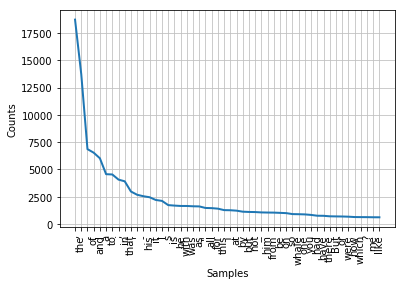

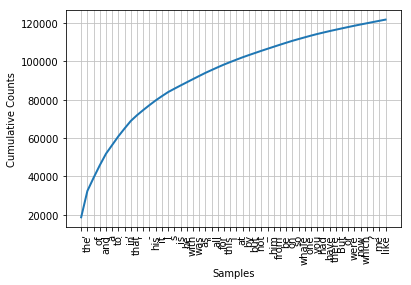

In [29]:
fdist1.plot(50, cumulative=False)
fdist1.plot(50, cumulative=True)

# Zad
Ile razy średnio powtarza się jedno słowo w tekście

In [30]:
len(text1)/len(dictionary)

13.502044830977896

### Widać że wiele nieinformatywnych słów występuje stanowczo za często.

Najczęściej występują stopwordsy, które raczej chcemy wykluczyć, bo zaburzają informacje w tekście - można je po prostu usunąć. 
* Można uzyskać listę stopwords z 
```python
nltk.corpus.stopwords
```

In [31]:
from nltk.corpus import stopwords

redundant_tokens = stopwords.words('english') + list(string.punctuation)

print(redundant_tokens)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Zad 

Proszę usunąć stopwordy i punktory. Jak teraz wyglądają najczęstsze słowa - proszę wypisać i narysować.

In [32]:
filtered_text1 = [w for w in text1 if not w in set(redundant_tokens)]

filtered_text1

['Moby',
 'Dick',
 'Herman',
 'Melville',
 '1851',
 'ETYMOLOGY',
 'Supplied',
 'Late',
 'Consumptive',
 'Usher',
 'Grammar',
 'School',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'coat',
 'heart',
 'body',
 'brain',
 'I',
 'see',
 'He',
 'ever',
 'dusting',
 'old',
 'lexicons',
 'grammars',
 'queer',
 'handkerchief',
 'mockingly',
 'embellished',
 'gay',
 'flags',
 'known',
 'nations',
 'world',
 'He',
 'loved',
 'dust',
 'old',
 'grammars',
 'somehow',
 'mildly',
 'reminded',
 'mortality',
 'While',
 'take',
 'hand',
 'school',
 'others',
 'teach',
 'name',
 'whale',
 'fish',
 'called',
 'tongue',
 'leaving',
 'ignorance',
 'letter',
 'H',
 'almost',
 'alone',
 'maketh',
 'signification',
 'word',
 'deliver',
 'true',
 '."',
 '--',
 'HACKLUYT',
 'WHALE',
 '...',
 'Sw',
 'Dan',
 'HVAL',
 'This',
 'animal',
 'named',
 'roundness',
 'rolling',
 'Dan',
 'HVALT',
 'arched',
 'vaulted',
 '."',
 '--',
 'WEBSTER',
 'S',
 'DICTIONARY',
 'WHALE',
 '...',
 'It',
 'immediately',
 'Dut',
 '

# Zad
Proszę wypisać najczęściej występujące słowa po usunięciu stopwordów i punktorów.

[('I', 2124), ('--', 1070), ('whale', 906), ('one', 889), ('But', 705), ('like', 624), ('The', 612), ('upon', 538), ('man', 508), ('ship', 507), ('Ahab', 501), ('."', 489), ('ye', 460), ('old', 436), ('sea', 433), ('would', 421), ('And', 369), ('head', 335), ('though', 335), ('boat', 330), ('time', 324), ('long', 318), ('It', 310), ('!"', 305), ('said', 302), (',"', 302), ('yet', 300), ('still', 299), ('great', 293), ('two', 285), ('seemed', 283), ('must', 282), ('Whale', 282), ('last', 277), ('way', 269), ('Stubb', 255), ('see', 253), ('?"', 252), ('Queequeg', 252), ('little', 247), ('round', 242), ('whales', 237), ('say', 237), ('In', 237), ('three', 237), ('men', 236), ('thou', 232), ('He', 230), ('may', 230), ('us', 228)]


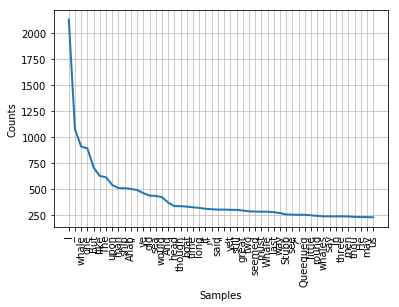

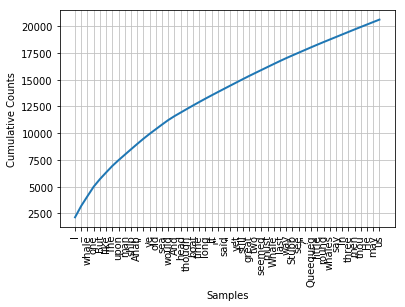

whale:  906


In [33]:
fdist2 = FreqDist(filtered_text1)

print(fdist2.most_common(50))
fdist2.plot(50, cumulative=False)
fdist2.plot(50, cumulative=True)

print('whale: ',  fdist2['whale'])

### Jak widać jeszcze jest trochę 'śmieci' w tekście

# Odmiana słów

Czy odmiana słowa wpływa na znaczenie tekstu? 

* **Stemowanie** - ucinanie (zmiana) końcówek słów tak aby podobne były nierozróżnialne. Stemowanie jest szybkie ale nie zawsze działa jak oczekujemy

* **Lematyzacja** - analiza słowa i doprowadzanie go do postacie podstawowej. Jest czasochłonne ale zwykle dokładniejsze niż stemowanie.

In [34]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()
print(porter_stemmer.stem('maximum'))
print(porter_stemmer.stem('maximal'))

maximum
maxim


In [35]:
from nltk.stem.snowball import EnglishStemmer

en_stemmer = EnglishStemmer()
print(en_stemmer.stem('maximum'))
print(en_stemmer.stem('maximal'))

maximum
maxim


In [36]:
from nltk.stem.lancaster import LancasterStemmer

lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print(lancaster_stemmer.stem('maximal'))

maxim
maxim


#### Ciekawa strona

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [37]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
wordnet_lemmatizer.lemmatize('dogs')

'dog'

In [38]:
filtered_text1

['Moby',
 'Dick',
 'Herman',
 'Melville',
 '1851',
 'ETYMOLOGY',
 'Supplied',
 'Late',
 'Consumptive',
 'Usher',
 'Grammar',
 'School',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'coat',
 'heart',
 'body',
 'brain',
 'I',
 'see',
 'He',
 'ever',
 'dusting',
 'old',
 'lexicons',
 'grammars',
 'queer',
 'handkerchief',
 'mockingly',
 'embellished',
 'gay',
 'flags',
 'known',
 'nations',
 'world',
 'He',
 'loved',
 'dust',
 'old',
 'grammars',
 'somehow',
 'mildly',
 'reminded',
 'mortality',
 'While',
 'take',
 'hand',
 'school',
 'others',
 'teach',
 'name',
 'whale',
 'fish',
 'called',
 'tongue',
 'leaving',
 'ignorance',
 'letter',
 'H',
 'almost',
 'alone',
 'maketh',
 'signification',
 'word',
 'deliver',
 'true',
 '."',
 '--',
 'HACKLUYT',
 'WHALE',
 '...',
 'Sw',
 'Dan',
 'HVAL',
 'This',
 'animal',
 'named',
 'roundness',
 'rolling',
 'Dan',
 'HVALT',
 'arched',
 'vaulted',
 '."',
 '--',
 'WEBSTER',
 'S',
 'DICTIONARY',
 'WHALE',
 '...',
 'It',
 'immediately',
 'Dut',
 '

# Zad 
Proszę wziąć jedno słowo w różnych jego odmianach i zobaczyć różnice pomiędzy stemowaniem i lematyzacją

# Zad
Weźmy nasz przykład z listą dokumentów - proszę napisać funkcję która będzie stemować tokeny.

In [39]:
stemmer = nltk.PorterStemmer()
filtered_stemm_text1 = [stemmer.stem(w) for w in filtered_text1] 
filtered_stemm_text1

['mobi',
 'dick',
 'herman',
 'melvil',
 '1851',
 'etymolog',
 'suppli',
 'late',
 'consumpt',
 'usher',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 '--',
 'threadbar',
 'coat',
 'heart',
 'bodi',
 'brain',
 'I',
 'see',
 'He',
 'ever',
 'dust',
 'old',
 'lexicon',
 'grammar',
 'queer',
 'handkerchief',
 'mockingli',
 'embellish',
 'gay',
 'flag',
 'known',
 'nation',
 'world',
 'He',
 'love',
 'dust',
 'old',
 'grammar',
 'somehow',
 'mildli',
 'remind',
 'mortal',
 'while',
 'take',
 'hand',
 'school',
 'other',
 'teach',
 'name',
 'whale',
 'fish',
 'call',
 'tongu',
 'leav',
 'ignor',
 'letter',
 'H',
 'almost',
 'alon',
 'maketh',
 'signif',
 'word',
 'deliv',
 'true',
 '."',
 '--',
 'hackluyt',
 'whale',
 '...',
 'Sw',
 'dan',
 'hval',
 'thi',
 'anim',
 'name',
 'round',
 'roll',
 'dan',
 'hvalt',
 'arch',
 'vault',
 '."',
 '--',
 'webster',
 'S',
 'dictionari',
 'whale',
 '...',
 'It',
 'immedi',
 'dut',
 'ger',
 'wallen',
 'A',
 'S',
 'walw',
 'ian',
 'roll',
 'wallow',


# Zad

Złączenie wszystkiego z powrotem do formy dokumentów. 

In [40]:
articles_cleaned = [' '.join(tokens) for tokens in filtered_stemm_text1]


In [41]:
len(articles_cleaned)

122531